In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score

In [3]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
np.cov(iris.data[:,2], iris.data[:,1])

array([[ 3.11627785, -0.32965638],
       [-0.32965638,  0.18997942]])

In [6]:
# 상관계수: -1 ~ 1
# 공분산 / (A변수 표준편차 * B변수 표준편차)
np.corrcoef(iris.data[:,0], iris.data[:,2])

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

In [7]:
X = iris.data[:, [2,3]]
y = iris.target
X.shape

(150, 2)

## 표준화

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [35]:
def dtree_grid_search(X, y, kfolds=5):
  parma_tree = {'criterion':['gini','entropy'],
                'max_depth':np.arange(3,12)}
  dtmodel = DecisionTreeClassifier()
  # 교차 검증
  dt_gscv = GridSearchCV(dtmodel, parma_tree, cv=kfolds)
  dt_gscv.fit(X, y)
  return dt_gscv.best_params_

In [45]:
bparam = dtree_grid_search(X_train_sc, y_train, 3)
print('최적화: ', bparam)

최적화:  {'criterion': 'gini', 'max_depth': 4}


In [46]:
# 위 결과를 토대로, gini, 4 사용
model = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [48]:
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
model.score(X_test_sc,y_test)

0.9555555555555556

## 교차검증

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [10]:
iris_data =load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증세트는3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv =3)
print(np.round(scores, 4)) # 검증별 정확도
np.round(np.mean(scores),4) # 평균 검증 정확도

[0.98 0.94 0.98]


0.9667

## 학습데이터 분리
## tree모델 : depth= 3, entropy방식

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
print(len(X_train),len(X_test))

105 45


In [13]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [14]:
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print('예측값:',y_pred)
print('실제값:',y_test)


예측값: [0 2 0 2 1 2 0 0 1 2 0 1 0 2 1 2 0 2 0 0 0 0 2 2 2 2 2 1 2 0 0 0 1 0 0 0 2
 0 2 2 2 1 0 1 1]
실제값: [0 2 0 2 1 2 0 0 1 2 0 1 0 2 1 1 0 2 0 0 0 0 2 2 1 2 2 1 2 0 0 0 1 0 0 0 2
 0 2 2 1 1 0 1 1]


In [17]:
print(accuracy_score(y_pred,y_test))

0.9333333333333333


In [18]:
(y_test != y_pred).sum()

3

In [19]:
# row, col 기준빈도수를 세어 도수
con_mat = pd.crosstab(y_test, y_pred, rownames=['pred'], colnames=['test'])

In [20]:
con_mat

test,0,1,2
pred,,,
0,19,0,0
1,0,9,3
2,0,0,14


In [21]:
model.score(X_test,y_test)
model.score(X_train,y_train)


0.9714285714285714

### 임의의 5개 데이터 쌍을 넣어서 예측

In [54]:
X_test2 = sc.fit_transform([[3.4,2.3],[4.2,5],[2.7,6],[3.4,2.8],[1.2,7]])

In [55]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 2, 1, 0, 1])

In [56]:
model.predict_proba(X_test2)


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5]])

In [57]:
# 이름 출력 : 'setosa', 'versicolor', 'virginica'
for i in y_pred2:
  print(i, iris['target_names'][i])

0 setosa
2 virginica
1 versicolor
0 setosa
1 versicolor


In [26]:
from matplotlib.colors import ListedColormap

In [27]:
def plot_decision_region(X, y, classifier, test_idx = None,
                         resolution=0.02, title=''):
  markers = ('s','x','o','^','v')
  colors = ('r','b','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

  # xx, yy를 평탄화 작업(1차원)-> ravel() / reshape()도 가능,으로 처리한후
  # 전치 행렬로 변환
  Z = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
  Z = Z.reshape(xx.shape)
  
  plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  X_test = X[test_idx, :]
  for idx, cl in enumerate(np.unique(y)):
    # plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
    #             c=cmap(idx), marker=markers[idx],
    #             label=cl)
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)
  if test_idx:
    X_test = X[test_idx,:]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=[],linewidth=1,marker='o',label='TestData')
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.legend(loc=2)
  plt.title=title
  plt.show()



In [58]:
x_combined_std = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

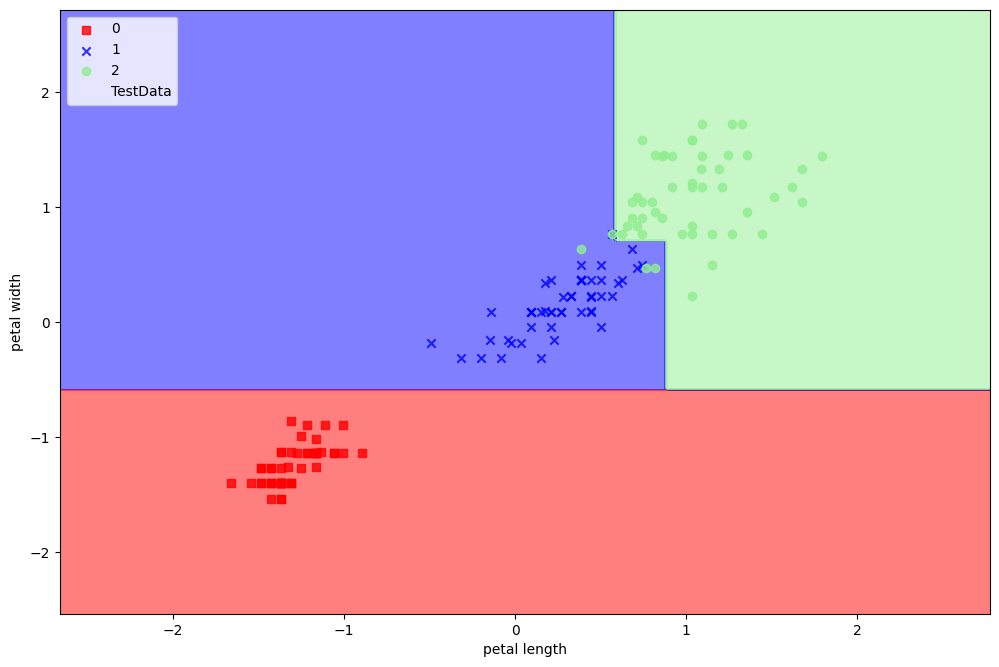

In [59]:
plot_decision_region(X=x_combined_std, y=y_combined,
                    classifier=model,
                    test_idx=range(105, 150),
                    title='Decision Tree')

In [60]:
from io import StringIO
import pydotplus

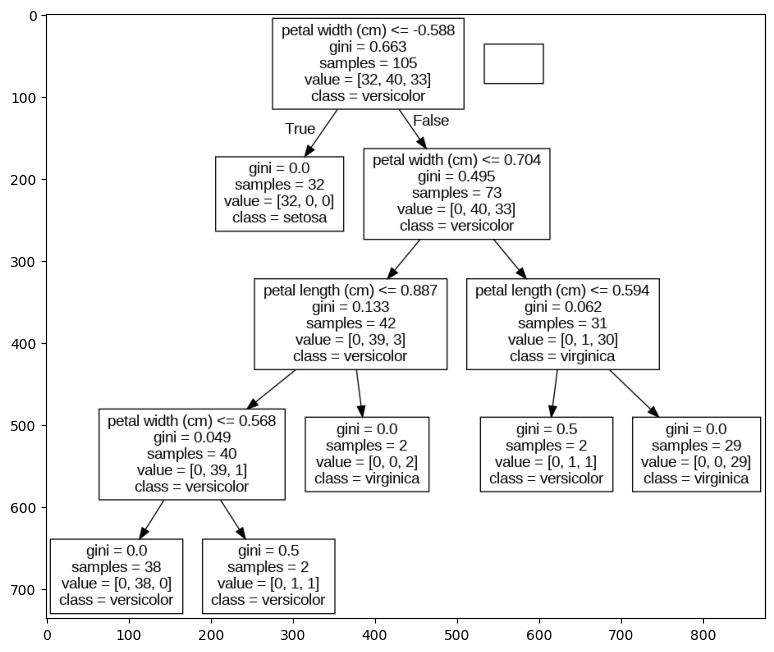

In [61]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,
                     feature_names=iris.feature_names[2:4],
                     class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree2.png')
img = plt.imread('tree2.png')
plt.rcParams.update({'figure.dpi':'100',
                     'figure.figsize':[12,8]})
plt.imshow(img)
plt.show()